In [1]:
from soft_tree import Tree
# sess = tf.InteractiveSession()

%load_ext autoreload
%autoreload 2

/home/vitaly/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


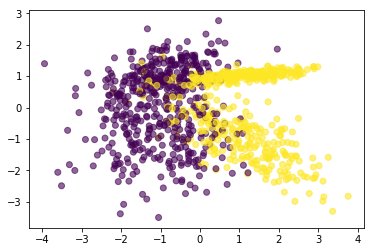

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

n_samples = 1000
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_samples=n_samples, class_sep=1)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6);

In [3]:
node_params = {
    'n_classes': 2,
    'max_depth': 3,
    'lamda': 10,
    'gamma': 0.9
}

nn_params = {
    'n_features': 2,
    'learning_rate': 0.2,
    'n_epochs': 10,
    'batch_size': 256
}

In [4]:
import tensorflow as tf

tf.reset_default_graph()
sess = tf.Session()
model = Tree(sess, node_params, nn_params)
model.fit(X, y)
y_pred = model.predict_proba(X)
sess.close()

In [6]:
from sklearn.model_selection import KFold
import numpy as np

def get_score(X_train, X_test, y_train, y_test):
    tf.reset_default_graph()
    with tf.Session() as sess:
        model = Tree(sess, node_params, nn_params, weight=True)
        model.fit(X, y)
        y_pred = model.predict_proba(X_test)[:, 1]
        return roc_auc_score(y_test, y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=228)
scores = []
for train_idx, test_idx in kf.split(X, y):
    score = get_score(X[train_idx], X[test_idx], y[train_idx], y[test_idx])
    scores.append(score)
    print(score)
print(np.mean(scores), np.std(scores))

0.9340736294517806
0.9493175431553593
0.9596992481203007
0.9414
0.8893000000000001
0.9347580841454881 0.024269571259925606


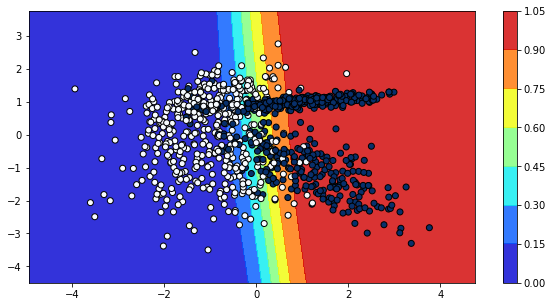

In [7]:
tf.reset_default_graph()

n_grid = 100
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, n_grid)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, n_grid).T
xx, yy = np.meshgrid(xx, yy)
grid = np.c_[xx.ravel(), yy.ravel()]

with tf.Session() as sess:
    model = Tree(sess, node_params, nn_params)
    model.fit(X, y)
    Z = model.predict_proba(grid)[:, 1].reshape((n_grid, n_grid))

fig, ax = plt.subplots(figsize=(10,5))
contour = ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap=plt.cm.Blues, edgecolor='k')
plt.colorbar(contour);

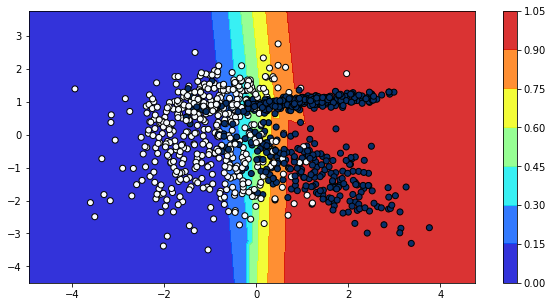

In [8]:
tf.reset_default_graph()

n_grid = 100
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, n_grid)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, n_grid).T
xx, yy = np.meshgrid(xx, yy)
grid = np.c_[xx.ravel(), yy.ravel()]

with tf.Session() as sess:
    model = Tree(sess, node_params, nn_params, weight=False)
    model.fit(X, y)
    Z = model.predict_proba(grid)[:, 1].reshape((n_grid, n_grid))

fig, ax = plt.subplots(figsize=(10,5))
contour = ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap=plt.cm.Blues, edgecolor='k')
plt.colorbar(contour);

In [19]:
import lightgbm as lgb
import numpy as np

n_samples = 100
X = np.random.randn(n_samples, 2)
y = np.random.randint(0, 2, n_samples)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
model = lgb.train(params, lgb.Dataset(X, y))